In [3]:
#train neural network by loading your images 
#how to collect images for deep learning project | custom image dataset for Machine Learning
import tensorflow as tf
import matplotlib.pyplot as plt
#import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

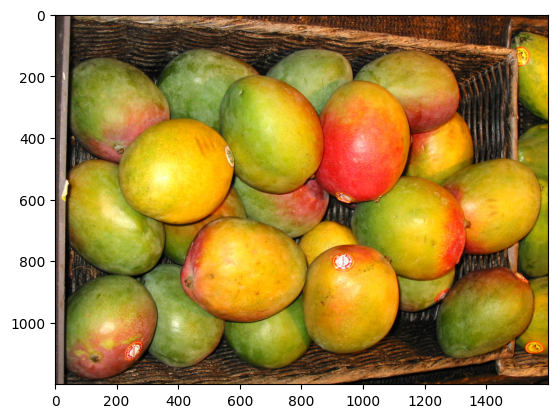

In [4]:
img = image.load_img("train/mango/Image_1.jpg")
plt.imshow(img)

In [5]:
from numpy import array
img2arr = array(img)
img2arr.shape

(1200, 1600, 3)

In [6]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset=train.flow_from_directory('train',target_size=(200,200),
                                       batch_size=3,class_mode='binary')
validation_dataset=validation.flow_from_directory('validation',target_size=(200,200),
                                       batch_size=3,class_mode='binary')
type(validation_dataset)

Found 66 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


keras.src.legacy.preprocessing.image.DirectoryIterator

In [8]:
train_dataset.class_indices

{'mango': 0, 'pears': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),
                                  activation='relu',
                                  input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),
                                  activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),
                                  activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dropout(0.2),
                                  
                                  tf.keras.layers.Dense(1,activation='sigmoid')
    
])

C:\Users\incor\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='binary_crossentropy',
             optimizer= "adam",
             metrics=['accuracy'])

In [15]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=10,
                   epochs=20,            
                   validation_data=validation_dataset)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5741 - loss: 1.0550 - val_accuracy: 0.4615 - val_loss: 0.7231
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 629ms/step - accuracy: 0.6059 - loss: 0.7078 - val_accuracy: 0.5385 - val_loss: 0.6394
Epoch 3/20
 2/10 ━━━━━━━━━━━━━━━━━━━━ 3s 396ms/step - accuracy: 0.1667 - loss: 1.0210    

C:\Users\incor\anaconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.3000 - loss: 0.8984 - val_accuracy: 0.5385 - val_loss: 0.6160
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6278 - loss: 0.5976 - val_accuracy: 0.6154 - val_loss: 0.6654
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 580ms/step - accuracy: 0.6054 - loss: 0.6798 - val_accuracy: 0.6923 - val_loss: 0.6523
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.6333 - loss: 0.6943 - val_accuracy: 0.5385 - val_loss: 0.6491
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 921ms/step - accuracy: 0.5687 - loss: 0.6515 - val_accuracy: 0.7692 - val_loss: 0.5907
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 512ms/step - accuracy: 0.6174 - loss: 0.5743 - val_accuracy: 0.4615 - val_loss: 0.7471
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.5167 - loss: 0.8622 - val_accuracy: 0.5385 - val_loss: 0.6755
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 917ms/step - accuracy: 0.7754 - loss: 0.4815 - val_accuracy: 0.8462 - val

In [16]:
dir_path='test'
for i in os.listdir(dir_path):
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


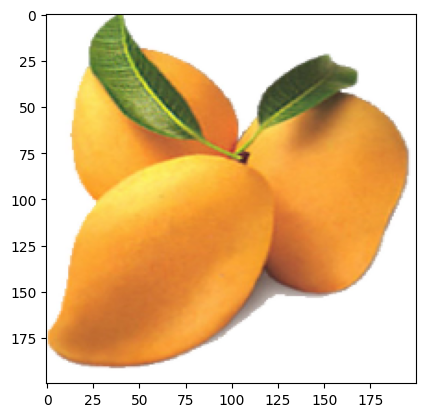

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
pear


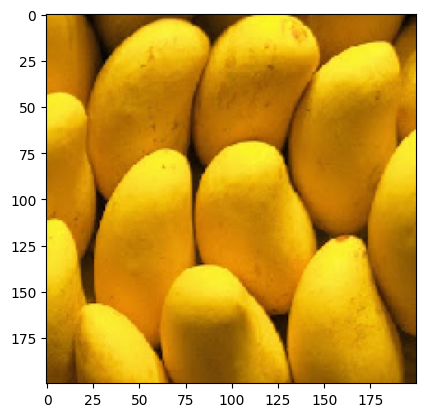

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
mango


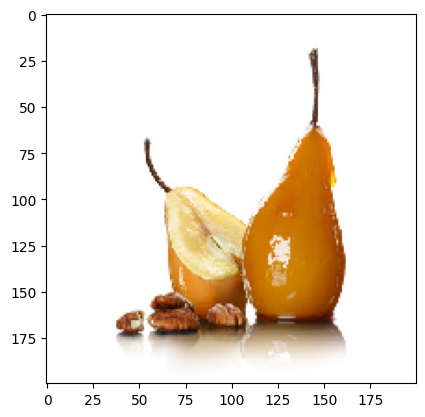

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
mango


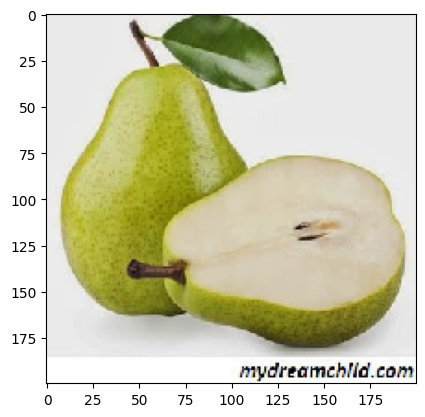

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
pear


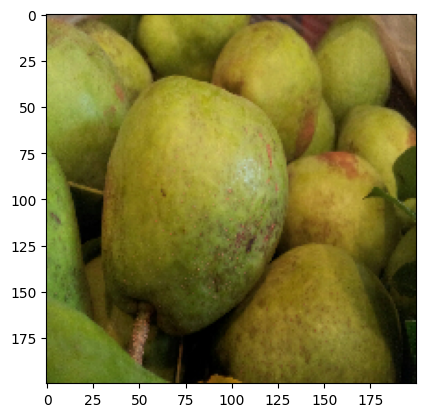

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
pear


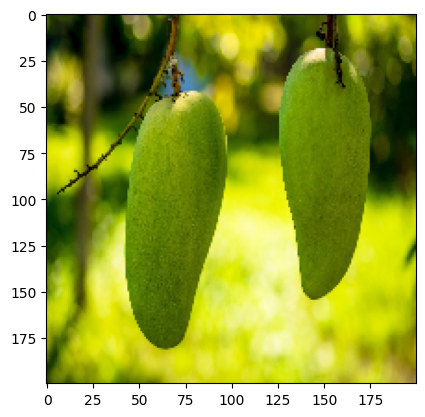

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
pear


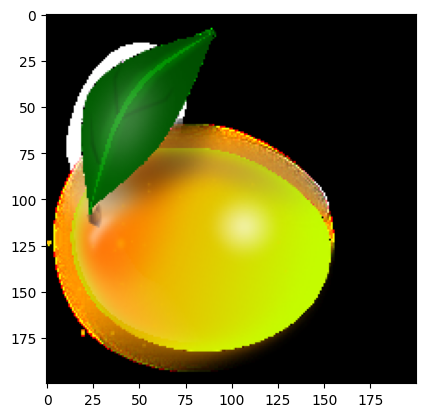

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
pear


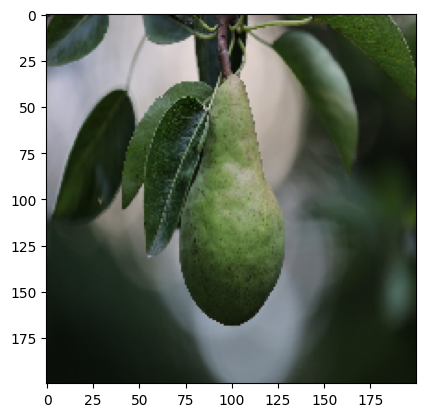

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
pear


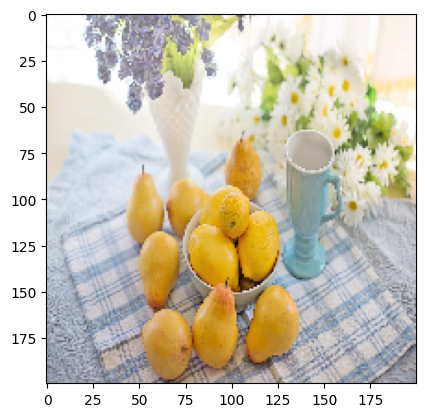

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
mango


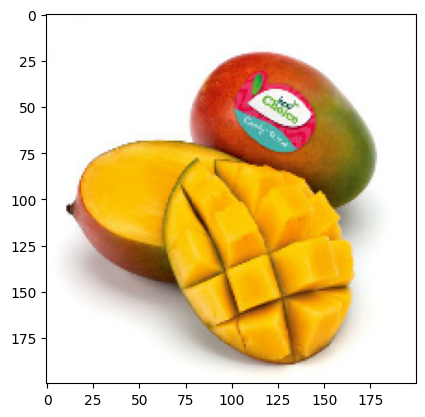

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
pear


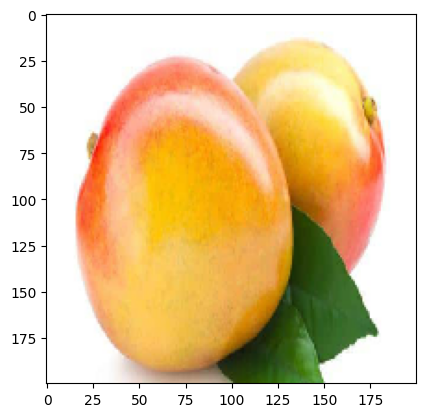

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
pear


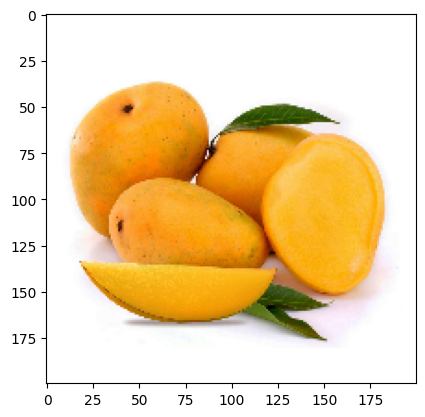

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
mango


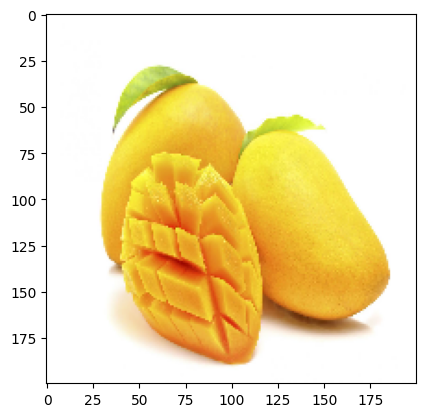

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
mango


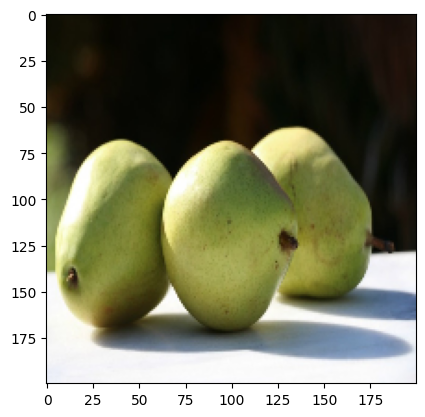

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
mango


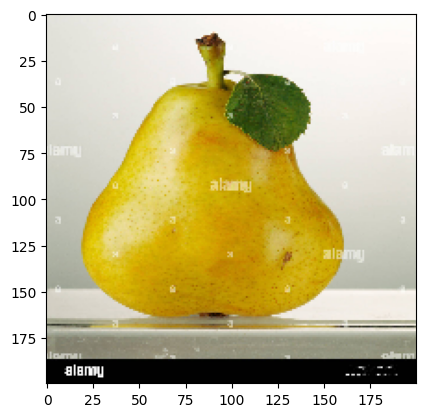

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
pear


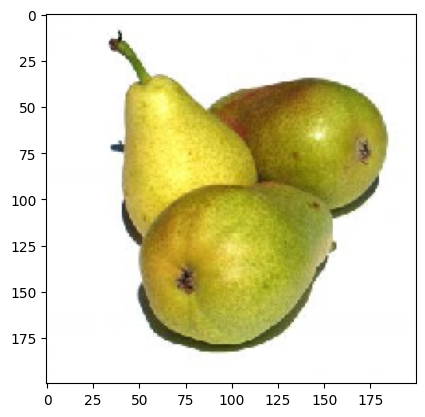

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
pear


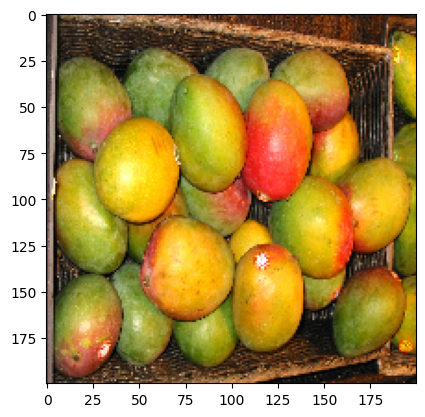

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
mango


In [17]:
dir_path='test'
for i in os.listdir(dir_path):
    img=image.load_img("test/"+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    if val==0:
        print("mango")
    else:
        print("pear")
